# Applying Random Forset (RF) classifier to virtual screening task

Welcome to this hands-on practical course on applying Machine Learning (ML) in Virtual Screening (VS) for drug discovery!
This course assumes no prior experience with ML, and all steps are explained. In this notebook, you'll understand key ML concepts, learn to process chemical compound data, train ML models, perform virtual screening. 
    

## Section 1: Introduction to Key Concepts  

**Virtual Screening (VS)** is a computational technique used to identify potential drug candidates from large libraries of compounds. 


**Machine Learning (ML)** enables us to build models that learn from known data to predict the activity of unseen compounds.  


**Supervised Learning**: We use labeled datasets (label active or inactive) to train models.  


**Binary Classification**: We predict whether a compound is active or inactive, but not an exact value (e.g. IC50 value, KI...)


**Feature Extraction**: Molecules are converted into numerical representations like **ECFP fingerprints**, which describe the chemical's strucutre that could be understand by computer.

## Section 2: Coding session

### Step 1: Load Python libraries that are needed

In [ ]:

import pandas as pd #a library for data manipulation, understand it as a spreadsheet 
import numpy as np # a library for numerical operations


from rdkit import Chem # rdkit is a library for cheminformatics
from rdkit.Chem import AllChem, Draw 
from rdkit.DataStructs import ConvertToNumpyArray


from sklearn.decomposition import PCA # sklearn is a library for dimensionality reduction
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

import matplotlib.pyplot as plt # a library for plotting

from physicochem_properties_for_pca import * # importing the functions for calculating the physicochemical properties for PCA

### Step 2: Load dataset for PPAR-γ

PPAR-γ (Peroxisome Proliferator-Activated Receptor Gamma) is a nuclear hormone receptor and transcription factor that plays a central role in regulating gene expression involved in glucose metabolism, lipid homeostasis, inflammation, and adipocyte differentiation.

In [ ]:
df_ppar = pd.read_csv('PPAR_gamma.csv') # load the dataset, df_ppar is a pandas dataframe that you named yourself
df_ppar # show the dataframe, looks like a spreadsheet

In [ ]:
df_ppar.head(5) # show the first 5 rows of the dataframe

### Step 3: Visualize Chemical Space (PCA)

In [ ]:
# PCA is a technique to reduce the dimensionality of the data, it can be used to visualize the data in a 2D space

# Functions to convert the fingerprints into a numpy array for PCA with a .py file in the same directory (./physicochem_properties_for_pca.py), including the a script to calculate physicochemical properties of molecules: 
''' 
number of nitrogen atoms, number of oxygen atoms, number of chiral centers, molecular weight, number of heavy atoms, 
number of hydrogen bond acceptors, number of hydrogen bond donors, logP, topological polar surface area, number of aromatic atoms,
formal charge, number of rings, number of bridgehead atoms, fraction of Csp3 atoms
'''
# Calculate the physicochemical properties of the molecules
get_physicochemical_properties(df_ppar,'preprocessedSmiles')
get_further_physicochemical_properties(df_ppar)

In [ ]:
# Confirm that only the feature columns are selected for analysis
featureList = []
for column in df_ppar.columns:  #deselect the columns that are not features
        if column not in ['id', 'activity', 'preprocessedSmiles', 'label', 'Molecule', 'PUBCHEM_ACTIVITY_OUTCOME','pChEMBL Value', 'activity_classification' ]:
        featureList.append(column)
# show the feature list to confirm 
featureList

In [ ]:
# load drug bank dataset as background for comparison
df_drugbank = pd.read_csv('drugbank.csv') # load the dataset, the feature list is the same as above, but pre-generated
# Check the first few rows of the dataframe
df_drugbank.head(5)

In [ ]:
# create PCA for the PPAR dataset and the drug bank dataset
dataframe = pd.concat([df_ppar, df_drugbank], axis=0) # combine the two dataframes, the first one is the PPAR dataset, the second one is the drug bank dataset
x = dataframe.loc[:, featureList].values
y = dataframe.loc[:, ['label']].values

x = StandardScaler().fit_transform(x) # standardize the data, this is important for PCA, otherwise the results will be biased by the scale of the features

pca = PCA(n_components=2)

principalComponents = pca.fit_transform(x)

variance = pca.explained_variance_ratio_
principalDF = pd.DataFrame(data=principalComponents, columns=['PC1', 'PC2'])

pcaDF = pd.concat([principalDF, dataframe[['label']], dataframe[['preprocessedSmiles']]], axis=1)

loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=featureList)
print(loadings)

In [ ]:
#define the function for plotting pca results
def plot_pca(pcaDF,variance,databases,colors):
    plt.rcParams['font.family'] = 'STIXGeneral'
    plt.rcParams['figure.figsize'] = 5, 5
    fig = plt.figure(dpi=300)
    axes = fig.add_subplot()
    axes.set_xlabel('PC1 ({:.2%})'.format(variance[0]), fontsize=16)
    axes.set_ylabel('PC2 ({:.2%})'.format(variance[1]), fontsize=16)

    for database, color in zip(databases, colors):
        indicesToKeep = pcaDF['label'] == database
        axes.scatter(pcaDF.loc[indicesToKeep, 'PC1'], pcaDF.loc[indicesToKeep, 'PC2'], c=color, s=5,alpha=0.8)
    axes.legend(databases, fontsize=15, loc='upper left', scatterpoints=5)

    plt.tick_params(labelsize=12)

    axes.set_yticks([-5,0,5,10,15])
    axes.set_xticks([-5,0,5,10,15])
 
    plt.tight_layout()
    plt.show()


In [ ]:
# plot the PCA results
plot_pca(pcaDF,variance,['PPAR','DrugBank'],['#145c37','#c5c9c7']) # Test whatever color code you want!

### Step 4: Preprocess the data, generate fingerprints as features

In [ ]:
# Define a function for generating Morgan fingerprints for each molecule
def mol2fingerprint(mol):
    # Generate Morgan fingerprint
    fp = AllChem.GetMorganFingerprintAsBitVect(mol, radius=2, nBits=2048)
    arr = np.zeros((1,), dtype=np.int8)
    ConvertToNumpyArray(fp, arr)
    return arr

# Apply the function, generate Morgan fingerprints for each molecule in the dataset
df_ppar['fingerprint'] = df_ppar['SMILES'].apply(lambda x: mol2fingerprint(Chem.MolFromSmiles(x)))

# Check the first few rows of the dataframe
df_ppar.head(5)

### Step 5: Train and Evaluate ML Model (Random Forest)

In [ ]:
# Define a function for generating Morgan fingerprints for each molecule
The functio

In [ ]:

# Section 6: Train and Evaluate ML Model (Random Forest)
cells.append(nbf.new_markdown_cell("## 6. Train a Machine Learning Model"))
cells.append(nbf.new_code_cell(
    "X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)\n"
    "model = RandomForestClassifier(n_estimators=100)\n"
    "model.fit(X_train, y_train)\n"
    "y_pred = model.predict(X_test)\n"
    "print(classification_report(y_test, y_pred))"
))

# Section 7: ROC Curve
cells.append(nbf.new_markdown_cell("## 7. Model Evaluation: ROC Curve"))
cells.append(nbf.new_code_cell(
    "y_score = model.predict_proba(X_test)[:, 1]\n"
    "fpr, tpr, _ = roc_curve(y_test, y_score)\n"
    "plt.plot(fpr, tpr, label='Random Forest')\n"
    "plt.plot([0, 1], [0, 1], '--', color='gray')\n"
    "plt.xlabel('False Positive Rate')\n"
    "plt.ylabel('True Positive Rate')\n"
    "plt.title('ROC Curve')\n"
    "plt.legend()\n"
    "plt.show()"
))

# Save notebook
nb['cells'] = cells
notebook_path = "/mnt/data/ML_Virtual_Screening_Workshop.ipynb"
with open(notebook_path, 'w', encoding='utf-8') as f:
    nbf.write(nb, f)

notebook_path


In [17]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib

In [18]:
train = pd.read_csv('./data2024dec/3_train_test_split/train_ECFP4.csv')
test = pd.read_csv('./data2024dec/3_train_test_split/test_ECFP4.csv')
# Make sure morgan2_cols is defined
morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
X_train = train[morgan2_cols] 
y_train = train.y_true_label
X_test = test[morgan2_cols]
y_test = test.y_true_label


In [20]:
# Train the 80% model on the best parameters
rf = RandomForestClassifier(**best_params)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features=0.4, n_estimators=200)

<Figure size 1000x800 with 0 Axes>

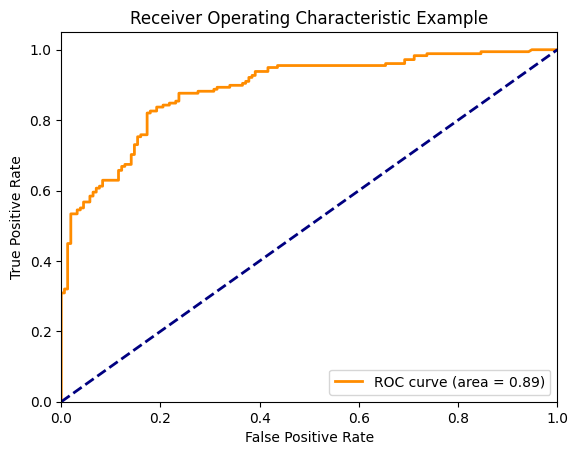

In [21]:
# Initialize a figure for plotting
plt.figure(figsize=(10, 8))
model = rf

# Predict probabilities for the positive class
y_pred_prob = model.predict_proba(test[morgan2_cols])[:, 1]

# Calculate the ROC curve points and AUC
fpr, tpr, thresholds = roc_curve(test['y_true_label'], y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [22]:
best_params

{'max_depth': 20, 'max_features': 0.4, 'n_estimators': 200}

In [23]:
fullset = pd.concat([train, test])
X_full = fullset[morgan2_cols]
y_full = fullset.y_true_label

full_forest = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_features=best_params['max_features'], max_depth=best_params['max_depth'], random_state=42)
full_forest.fit(X_full, y_full)

#save the model
import joblib
joblib.dump(full_forest, './models/RF_model.pkl')


['./models/RF_model.pkl']

In [24]:
## screening Molport database
for i in range(1, 11):
    input_file = f"/data/db/chemicals/molport_FP_RDKIT2D/with_fp_2d_descip/Molport_preprocessed{i}_withdescrptorandfp_washed.csv"
    output_file = f"./results/RF_result/molport{i}_RF_screen.csv"
    model = joblib.load('./models/RF_model.pkl')
    # need modifications

    X_pre = pd.read_csv(input_file)
    morgan2_cols = ['morgan2_b'+str(i) for i in list(range(2048))]
    X = X_pre[morgan2_cols]
    predictions_proba = model.predict_proba(X)[:, 1]
    X_pre['Predicted_result'] = predictions_proba
    predictions_proba.sort()
    X_active = X_pre.loc[X_pre['Predicted_result']>= 0.7]
    print(len(X_active))
    X_active = X_active[['preprocessedSmiles', 'MOLPORTID', 'Predicted_result']]
    X_active.to_csv(output_file, index=False)

5570
7195
6992
8135
6453
7385
11117
9470
7786
1525


In [25]:
X_active

,preprocessedSmiles,MOLPORTID,Predicted_result
1,Cc1nc(C2CC2)cc(N2CCN(c3ncnc4ncn(C)c34)CC2)n1,MolPort-047-929-528,0.765028
2,CSc1ncc(C)c(N2CCN(Cc3[nH]nc4c3CCCC4)CC2)n1,MolPort-047-929-529,0.746822
21,c1cc2ccc(-c3cnc(NC4CCOCC4)nc3)cc2[nH]1,MolPort-047-929-550,0.711379
63,Cn1nc(C2CCN(c3nc4c(cc3C#N)COCC4)CC2)n(C2CC2)c1=O,MolPort-047-929-594,0.726492
109,CCn1cnc2c(N3CCN(c4nccnc4C#N)CC3)ncnc21,MolPort-047-929-646,0.834032
...,...,...,...
93636,CSc1ncc(C#N)c(N2CCC(COc3ccccn3)CC2)n1,MolPort-051-567-826,0.710595
93637,CSc1ncc(C#N)c(N2CCCC(COc3ccccn3)C2)n1,MolPort-051-567-827,0.700323
93818,Cn1cnc2c(N3CCCC(COc4ccccn4)C3)ncnc21,MolPort-051-568-009,0.779807
93824,c1ccc(OCC2CCCN(c3ccc4nncn4n3)C2)nc1,MolPort-051-568-015,0.736133


In [26]:
# combine all the output files
for i in range(1, 11):
    file = f"./results/RF_result/molport{i}_RF_screen.csv"
    if i == 1:
        df = pd.read_csv(file)
    else:
        df = pd.concat([df, pd.read_csv(file)])
df.to_csv('./results/RF_result/molport_RF_screen.csv', index=False)
df

,preprocessedSmiles,MOLPORTID,Predicted_result
0,COc1ccc(S(=O)(=O)n2ccnc2)c2ccccc12,MolPort-000-009-908,0.869066
1,CCOC(=O)c1c(NC(=O)CSc2nc3ccc(C)cc3cc2C#N)sc(C)c1C,MolPort-000-010-515,0.784647
2,CCOC(=O)c1cccc(NC(=O)CSc2nc3ccc(OCC)cc3cc2C#N)c1,MolPort-000-010-674,0.751087
3,O=C(CSc1nnc2c3c4c(sc3ncn12)CCCC4)Nc1cccc(Cl)c1,MolPort-000-011-458,0.787582
4,Cc1cc(C)cc(NC(=O)CSc2nnc3c4c5c(sc4ncn23)CCCC5)c1,MolPort-000-011-480,0.741909
...,...,...,...
1520,CSc1ncc(C#N)c(N2CCC(COc3ccccn3)CC2)n1,MolPort-051-567-826,0.710595
1521,CSc1ncc(C#N)c(N2CCCC(COc3ccccn3)C2)n1,MolPort-051-567-827,0.700323
1522,Cn1cnc2c(N3CCCC(COc4ccccn4)C3)ncnc21,MolPort-051-568-009,0.779807
1523,c1ccc(OCC2CCCN(c3ccc4nncn4n3)C2)nc1,MolPort-051-568-015,0.736133


In [27]:
## get 10 percent random sample from df
#df.sample(frac=0.1).to_csv('./results/RF_result/molport_RF_screen_10%sample.csv', index=False)